In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = datasets.cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 108s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [25]:
classes = ["airplane","automobile","bird","dog","deer","cat","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

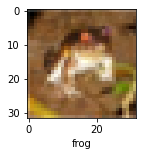

In [10]:
plot_sample(X_train, y_train, 0)

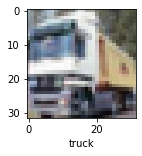

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B)
# and each value in the channel can range from 0 to 255. Hence to normalize
# in 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4704 - accuracy: 0.4682
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0794 - accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9505 - accuracy: 0.6695
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8660 - accuracy: 0.6987
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7980 - accuracy: 0.7208
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7413 - accuracy: 0.7439
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6959 - accuracy: 0.7586
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6490 - accuracy: 0.7746
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6094 - accuracy: 0.7862
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9706 - accuracy: 0.6883


[0.9705501794815063, 0.6883000135421753]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[5.5928767e-04, 6.6821790e-06, 7.9129720e-03, 8.6562157e-01,
        2.1840958e-03, 1.1210883e-01, 1.0169749e-02, 6.0823571e-05,
        1.3694671e-03, 6.4912815e-06],
       [3.9433818e-03, 7.1884805e-01, 3.4418199e-06, 1.6915835e-07,
        3.7087926e-08, 6.7691509e-08, 4.3046984e-07, 1.5090793e-09,
        2.7667871e-01, 5.2571308e-04],
       [3.9112869e-01, 9.0674020e-02, 2.0362517e-02, 1.4618234e-02,
        3.0514717e-03, 1.1245754e-03, 7.3150685e-04, 3.2241491e-04,
        4.6996582e-01, 8.0208331e-03],
       [9.4591767e-01, 6.0818513e-04, 4.2311195e-03, 6.3587649e-05,
        7.4800808e-04, 1.7353658e-06, 1.4881109e-05, 2.3811613e-06,
        4.8388045e-02, 2.4313291e-05],
       [7.6952995e-07, 5.8888386e-06, 1.7817706e-02, 5.5144850e-02,
        2.7151468e-01, 7.2176610e-03, 6.4824599e-01, 6.1644610e-06,
        4.6229627e-05, 7.6060481e-08]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

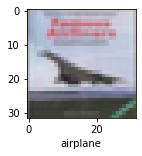

In [20]:
plot_sample(X_test, y_test,3)

In [21]:
classes[y_classes[3]]

'airplane'

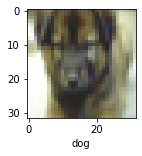

In [23]:
plot_sample(X_test, y_test,33)

In [26]:
classes[y_classes[33]]

'dog'

In [27]:
y_classes[33]

3